In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats


sns.set_style("whitegrid")
sns.set(font='serif')
sns.set_style("white", {
  "font.family": "serif",
  "font.serif": ["Times", "Palatino", "serif"],
})

FILENAME = 'output'

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(df):
    unique_models = df['model'].unique()
    num_models = len(unique_models)

    fig, axes = plt.subplots(1, num_models, figsize=(11 * num_models, 10))

    # Ensure axes is iterable even for one model
    if num_models == 1:
        axes = [axes]

    for i, model_name in enumerate(unique_models):
        model_results = df[df['model'] == model_name]
        ax = sns.barplot(
            data=model_results,
            x='Severity',
            y='f1-score(weighted avg)',
            hue='strategy',
            errorbar='ci',  # Use standard deviation as error bars
            dodge=True,
            ax=axes[i]
        )

        ax.set_xlabel("F1-Score", fontsize=42)
        ax.set_ylim(.5, 1)

        if i == 0:
            ax.set_ylabel("Severity", fontsize=42)
        else:
            ax.set_yticklabels([])
            ax.set_ylabel("")

        # ax.axhline(y=0.5, color='grey', linestyle='--', linewidth=1)
        # ax.axhline(y=1.5, color='grey', linestyle='--', linewidth=1)
        # ax.axhline(y=2.5, color='grey', linestyle='--', linewidth=1)
        ax.tick_params(axis='x', labelsize=24)
        ax.tick_params(axis='y', labelsize=24)
        ax.set_title(model_name, fontsize=42)

    # Remove legends from individual subplots
    for ax in axes:
        ax.legend_.remove()

    # Add a single legend for the figure
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles, labels, title="Strategy", loc='lower center',
        bbox_to_anchor=(0.5, -0.42), fontsize=42, title_fontsize=42, ncol=3
    )
    fig.suptitle('Distributions Domain Range', fontsize=50, y=1)
    plt.tight_layout()
    plt.savefig('../output/results_ci_each_domain.pdf', bbox_inches='tight')
    plt.show()

In [18]:
results = pd.read_csv(f'../output/{FILENAME}.csv')

results['evaluation_set'] = results['evaluation_set'].str.replace(' ', '_').str.lower()
results['evaluation_set'] = results['evaluation_set'].str.replace('-', '_').str.lower()

characterization_df = pd.read_csv('../results/agnews/agnews_c_divergences_categories.csv')

characterization_df['corruption'] = characterization_df['corruption'].str.replace(' ', '_').str.lower()

merged_results = results.merge(
    characterization_df[['corruption', 'category']],
    left_on='evaluation_set',
    right_on='corruption',
    how='left'
)

merged_results['Severity'] = np.where(
    merged_results['evaluation_set'] == 'in_distribution',
    'In-Distribution',
    merged_results['category']
)

merged_results.drop(columns=['corruption'], inplace=True)

merged_results

,strategy,model,evaluation_set,date_finished,training_time,fold,accuracy,loss,precision(0),recall(0),...,precision(macro avg),recall(macro avg),f1-score(macro avg),support(macro avg),precision(weighted avg),recall(weighted avg),f1-score(weighted avg),support(weighted avg),category,Severity
0,Baseline,LSTM,in_distribution,2024-12-20 16:42:50.234604,473.550544,1,0.902763,0.305482,0.939292,0.879474,...,0.903815,0.902763,0.902829,7600.0,0.903815,0.902763,0.902829,7600.0,NaN,In-Distribution
1,Baseline,LSTM,typo_1,2024-12-20 16:42:52.323193,473.550544,1,0.807368,0.525294,0.886525,0.789474,...,0.832633,0.807368,0.810937,7600.0,0.832633,0.807368,0.810937,7600.0,Lowest,Lowest
2,Baseline,LSTM,typo_2,2024-12-20 16:42:54.265349,473.550544,1,0.669605,0.874136,0.850692,0.614737,...,0.766824,0.669605,0.678593,7600.0,0.766824,0.669605,0.678593,7600.0,Mid-Range,Mid-Range
3,Baseline,LSTM,typo_3,2024-12-20 16:42:56.198118,473.550544,1,0.532368,1.206868,0.798839,0.434737,...,0.700892,0.532368,0.533997,7600.0,0.700892,0.532368,0.533997,7600.0,Mid-Range,Mid-Range
4,Baseline,LSTM,typo_4,2024-12-20 16:42:58.096580,473.550544,1,0.433816,1.452097,0.745891,0.310526,...,0.653777,0.433816,0.414047,7600.0,0.653777,0.433816,0.414047,7600.0,Mid-Range,Mid-Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,DefaultAug+S&P,LSTM,shuffling_1,2024-12-21 18:37:07.853457,419.073817,10,0.880263,0.368072,0.879195,0.896316,...,0.882622,0.880263,0.879899,7600.0,0.882622,0.880263,0.879899,7600.0,Mid-Range,Mid-Range
2546,DefaultAug+S&P,LSTM,shuffling_2,2024-12-21 18:37:09.866745,419.073817,10,0.882632,0.366983,0.879257,0.896842,...,0.884831,0.882632,0.882290,7600.0,0.884831,0.882632,0.882290,7600.0,Mid-Range,Mid-Range
2547,DefaultAug+S&P,LSTM,shuffling_3,2024-12-21 18:37:11.849932,419.073817,10,0.880658,0.364431,0.878678,0.895789,...,0.882700,0.880658,0.880205,7600.0,0.882700,0.880658,0.880205,7600.0,Mid-Range,Mid-Range
2548,DefaultAug+S&P,LSTM,shuffling_4,2024-12-21 18:37:13.834800,419.073817,10,0.883816,0.365585,0.886056,0.896316,...,0.885565,0.883816,0.883465,7600.0,0.885565,0.883816,0.883465,7600.0,Mid-Range,Mid-Range


# Out of Distribution Stratified by Corruption Type


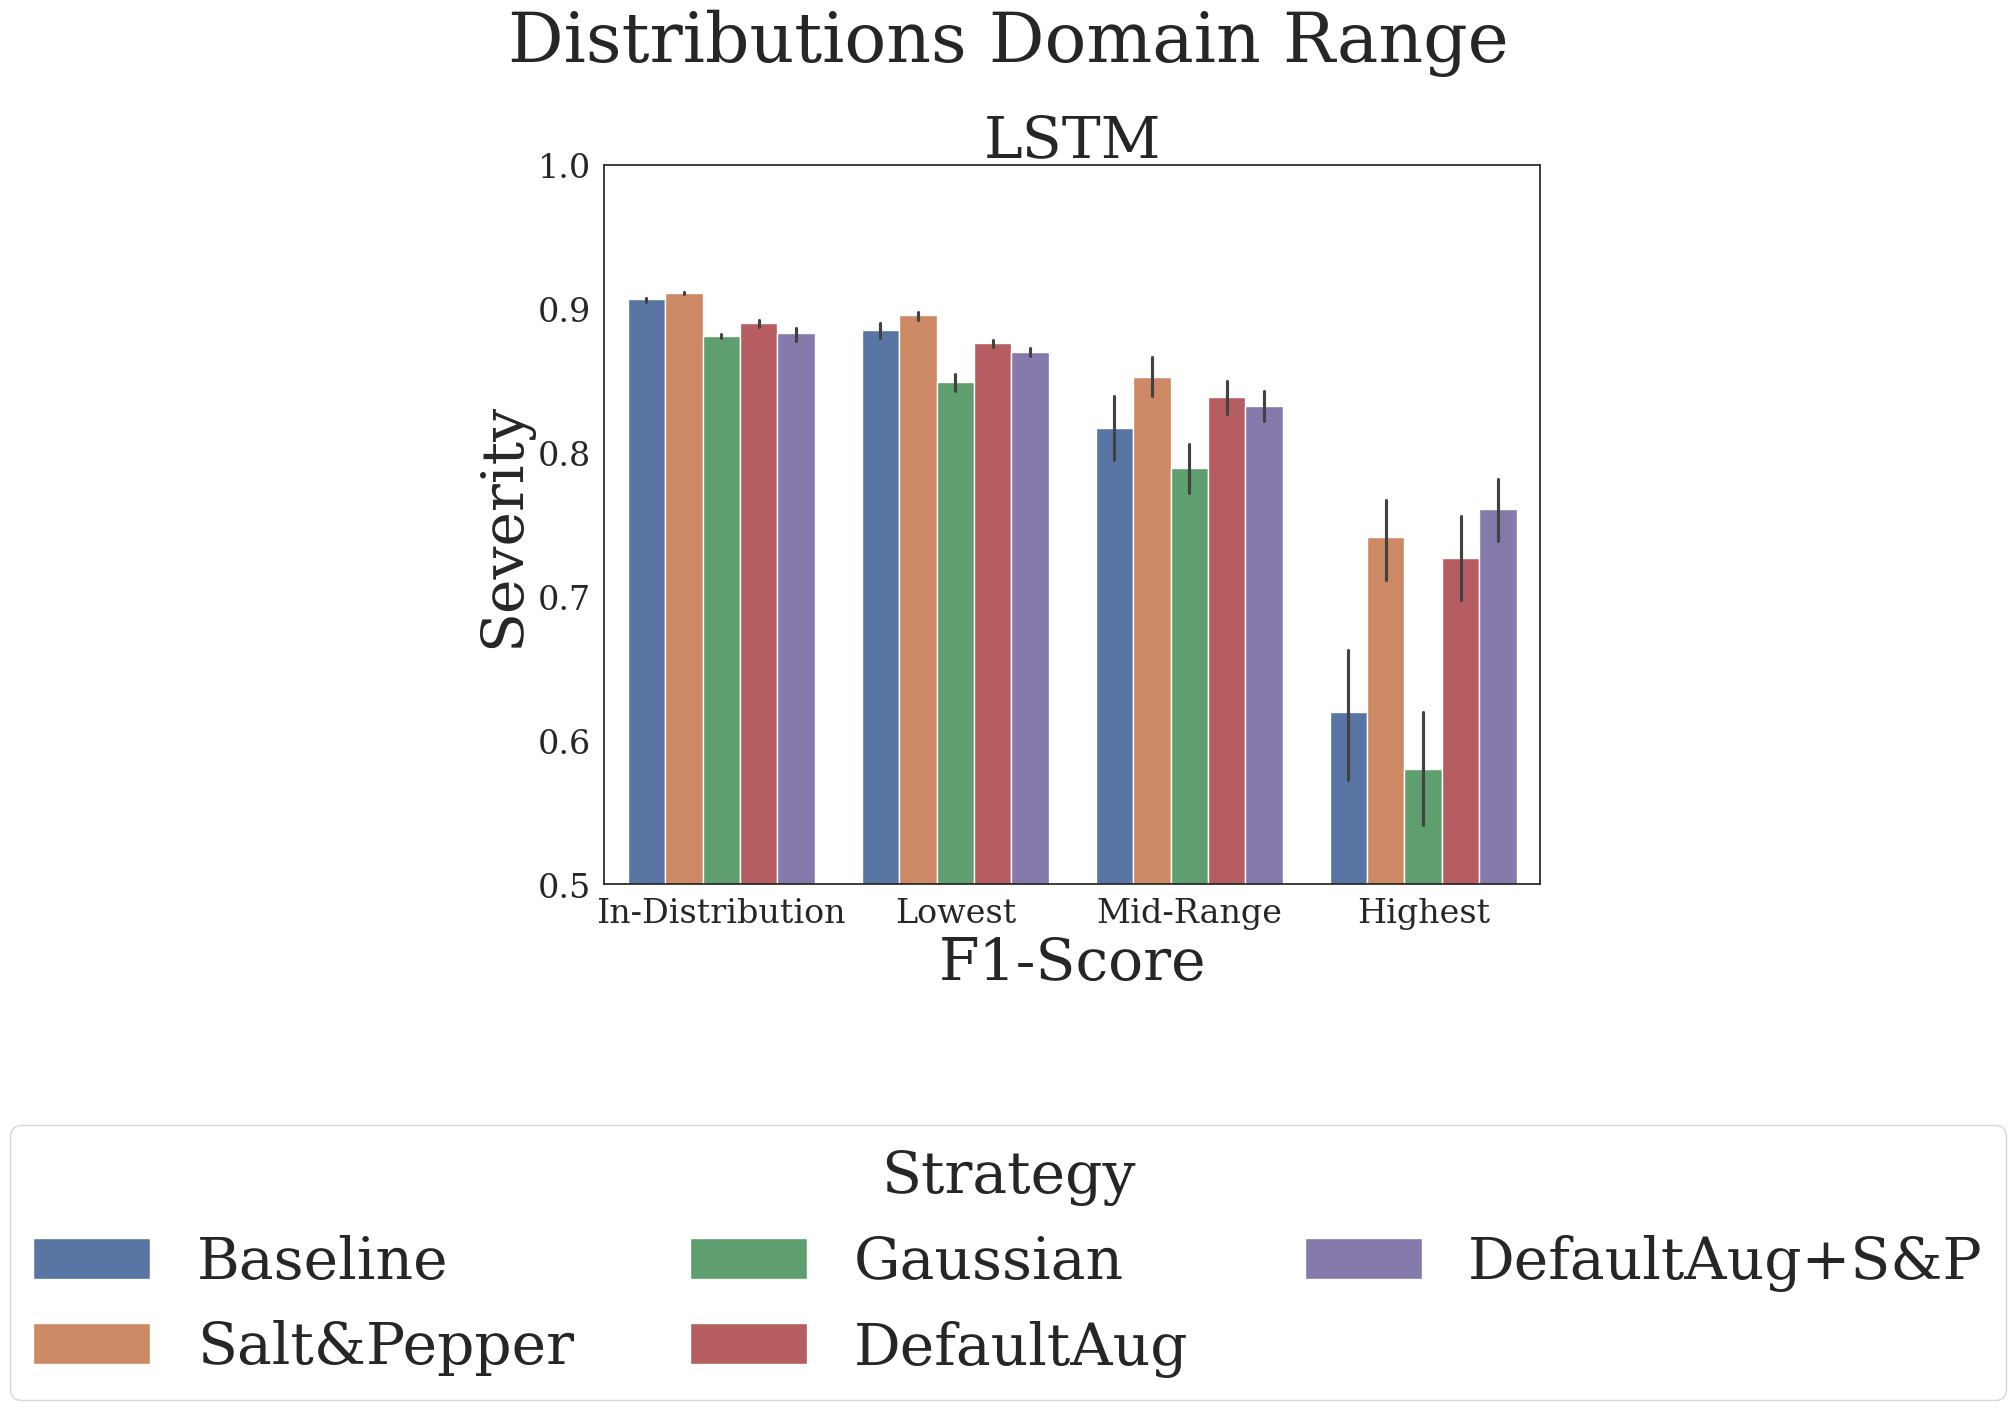

In [19]:
plot_results(merged_results)

In [15]:
def bootstrap_confidence_interval(data, num_samples=1000, ci=0.95):
    data = np.array(data)

    res = stats.bootstrap((data,), np.mean, confidence_level=ci, n_resamples=num_samples, method='basic')
    return res.confidence_interval.low, res.confidence_interval.high

In [26]:
grouped = results.groupby(['model', 'strategy', 'Severity'])
confidence_intervals = grouped['f1-score(weighted avg)'].apply(lambda x: bootstrap_confidence_interval(x.values))
average_fscore = grouped['f1-score(weighted avg)'].mean()

confidence_intervals_df = pd.DataFrame({
    'Model': confidence_intervals.index.get_level_values('model'),
    'strategy': confidence_intervals.index.get_level_values('strategy'),
    'Severity': confidence_intervals.index.get_level_values('Severity'),
    'F-Score 95%': [f"{avg:.4f} ({lower:.4f}, {upper:.4f})" for (avg, (lower, upper)) in zip(average_fscore, confidence_intervals)]
})

confidence_intervals_df

,Model,strategy,Severity,F-Score 95%
0,LSTM,Baseline,Corruption,"0.7614 (0.7368, 0.7870)"
1,LSTM,Baseline,In-Distribution,"0.9045 (0.9029, 0.9060)"
2,LSTM,DefaultAug,Corruption,"0.8027 (0.7857, 0.8200)"
3,LSTM,DefaultAug,In-Distribution,"0.8966 (0.8949, 0.8983)"
4,LSTM,DefaultAug+Gaussian,Corruption,"0.7360 (0.7157, 0.7572)"
5,LSTM,DefaultAug+Gaussian,In-Distribution,"0.8784 (0.8769, 0.8799)"
6,LSTM,DefaultAug+S&P,Corruption,"0.8226 (0.8080, 0.8375)"
7,LSTM,DefaultAug+S&P,In-Distribution,"0.9116 (0.9103, 0.9130)"
8,LSTM,Gaussian,Corruption,"0.7406 (0.7201, 0.7621)"
9,LSTM,Gaussian,In-Distribution,"0.8796 (0.8782, 0.8809)"
